In [2]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

/Users/mohankumarchinnasamy/Documents/my_test_works/ml_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df =pd.read_csv("/Users/mohankumarchinnasamy/Documents/my_test_works/Multiclass_Diabetes_Dataset.csv")
X = df.drop("Class", axis=1).values
y = df["Class"].values
df.shape

(264, 12)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [5]:
df["Class"].unique()

array([0, 1, 2])

In [6]:
DT_model = DecisionTreeClassifier(random_state=42,max_depth=3)
DT_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
feature_importances = DT_model.feature_importances_
feature_names = df.drop("Class", axis=1).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

   Feature  Importance
4    HbA1c    0.933853
10     BMI    0.030212
1      AGE    0.028190
3       Cr    0.007745
0   Gender    0.000000
2     Urea    0.000000
5     Chol    0.000000
6       TG    0.000000
7      HDL    0.000000
8      LDL    0.000000
9     VLDL    0.000000


/var/folders/wb/_lmklwsx4y32ghxtswvn8zlc0000gp/T/ipykernel_17520/2046772551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


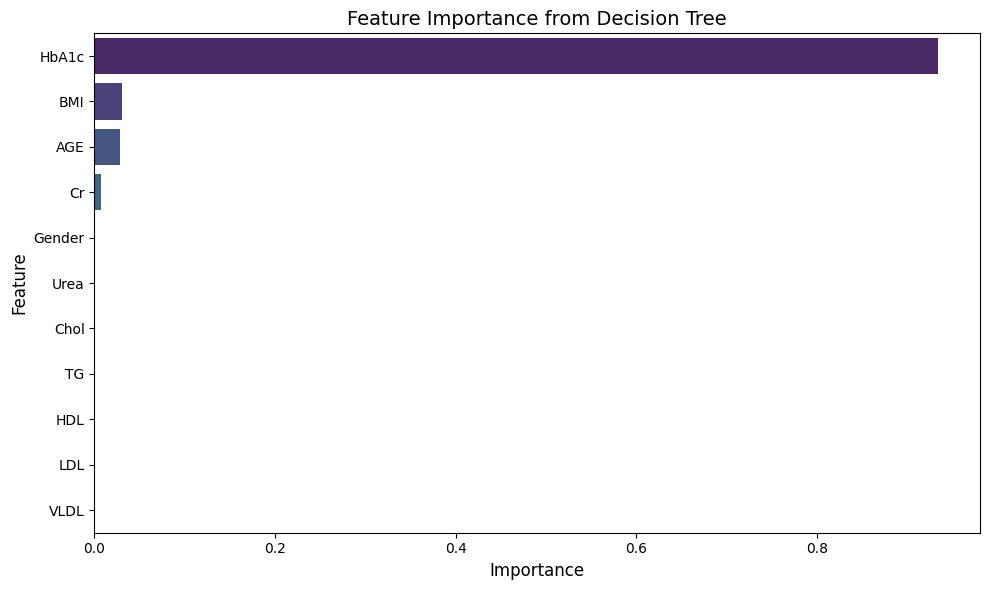

In [8]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")

plt.title("Feature Importance from Decision Tree", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

In [9]:
# Create SHAP explainer for tree-based models
explainer = shap.TreeExplainer(DT_model)

# Get SHAP values for training data
shap_values = explainer.shap_values(X_train)

# Feature names
feature_names = df.drop("Class", axis=1).columns

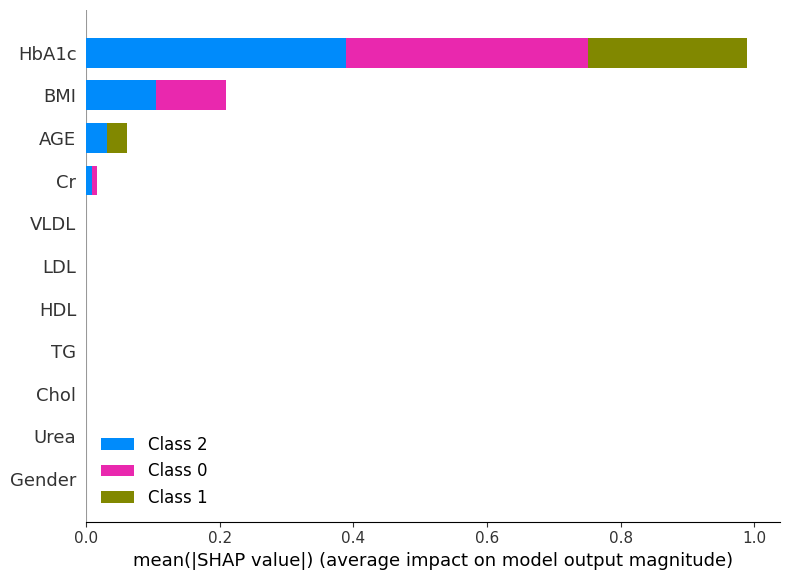

In [11]:
shap.summary_plot(shap_values, X_train, feature_names=feature_names, plot_type="bar")
